SyntaxError: invalid syntax (<ipython-input-1-f3e87111d26d>, line 1)

In [8]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [82]:
import pandas as pd
#data = pd.read_csv('sign_mnist_train.csv')
data = pd.read_csv('sign_data2.csv')
data.shape

(2495, 6085)

In [83]:
Y = data['label']
X = data.drop('label',1)

#Y.describe()


In [10]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2490    4
2491    4
2492    4
2493    4
2494    4
Name: label, Length: 2495, dtype: int64

In [5]:
myDict = {0: 'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M',
          13: 'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [86]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train = X_train/255
X_test = X_test/255



In [64]:
X_train.shape

(1671, 6084)

In [9]:


#from sklearn.preprocessing import StandardScaler 
#from sklearn import preprocessing

#normalizer = preprocessing.Normalizer().fit(X_train)
#X_train    =    normalizer.transform(X_train) 
#X_test     =   normalizer.transform(X_test)

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)  

In [14]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,6074,6075,6076,6077,6078,6079,6080,6081,6082,6083
59,0.266667,0.250980,0.274510,0.274510,0.278431,0.282353,0.278431,0.262745,0.274510,0.258824,...,0.698039,0.682353,0.694118,0.682353,0.631373,0.694118,0.690196,0.694118,0.690196,0.686275
583,0.266667,0.278431,0.278431,0.278431,0.298039,0.298039,0.282353,0.266667,0.309804,0.286275,...,0.686275,0.682353,0.698039,0.682353,0.698039,0.725490,0.690196,0.705882,0.713725,0.690196
2475,0.274510,0.247059,0.270588,0.282353,0.282353,0.266667,0.278431,0.250980,0.274510,0.282353,...,0.694118,0.698039,0.686275,0.698039,0.686275,0.682353,0.709804,0.701961,0.701961,0.627451
207,0.282353,0.286275,0.274510,0.254902,0.313725,0.258824,0.247059,0.274510,0.286275,0.274510,...,0.686275,0.678431,0.686275,0.686275,0.690196,0.686275,0.694118,0.713725,0.674510,0.705882
2218,0.258824,0.266667,0.262745,0.270588,0.262745,0.266667,0.266667,0.274510,0.250980,0.266667,...,0.682353,0.690196,0.690196,0.678431,0.690196,0.690196,0.694118,0.694118,0.694118,0.674510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.203922,0.278431,0.274510,0.278431,0.301961,0.282353,0.278431,0.290196,0.278431,0.274510,...,0.686275,0.690196,0.698039,0.678431,0.698039,0.701961,0.698039,0.694118,0.698039,0.701961
1095,0.301961,0.329412,0.329412,0.325490,0.325490,0.325490,0.337255,0.364706,0.286275,0.345098,...,0.674510,0.694118,0.694118,0.698039,0.690196,0.686275,0.709804,0.701961,0.686275,0.709804
1130,0.309804,0.333333,0.325490,0.345098,0.329412,0.364706,0.337255,0.337255,0.325490,0.360784,...,0.686275,0.658824,0.694118,0.678431,0.698039,0.686275,0.686275,0.698039,0.682353,0.698039
1294,0.356863,0.329412,0.333333,0.356863,0.333333,0.329412,0.333333,0.337255,0.329412,0.349020,...,0.658824,0.686275,0.694118,0.690196,0.686275,0.694118,0.701961,0.686275,0.709804,0.686275


In [10]:
X_test.shape

(9061, 784)

In [15]:
clf = MLPClassifier(hidden_layer_sizes = (40,40,40,40,40,40,40,40), random_state=1, early_stopping=True).fit(X_train, y_train)

In [16]:
clf.score(X_test, y_test)

0.9927184466019418

In [18]:
#X_test[:1, :].shape
Y_pred = clf.predict(X_test)

print("yp = ", Y_pred)

yp =  [4 3 1 4 2 0 3 1 1 1 0 4 4 2 4 3 1 3 0 2 0 3 2 2 2 0 3 1 0 0 3 2 0 0 4 4 0
 3 4 2 4 0 1 4 3 1 3 3 0 4 4 0 4 4 4 0 1 3 2 4 4 2 2 0 2 0 1 2 2 2 1 2 0 1
 3 2 3 3 2 0 3 4 2 4 1 3 0 0 3 3 4 3 1 0 4 3 2 2 1 0 2 2 2 2 4 0 4 3 4 2 3
 4 2 0 1 1 3 4 0 4 4 3 2 3 3 3 0 0 1 3 4 3 2 4 1 0 1 4 4 3 1 3 0 3 2 3 0 3
 1 1 3 2 3 4 3 0 4 0 0 1 2 4 3 3 2 3 3 0 4 2 0 1 1 1 3 0 4 2 2 4 2 1 1 3 3
 3 1 4 3 4 2 2 3 0 4 2 3 4 3 2 3 1 4 1 3 1 0 3 2 4 0 0 1 1 1 2 3 1 4 1 2 2
 2 2 1 3 2 0 2 3 0 2 0 4 3 2 4 2 3 2 3 4 1 0 4 0 2 0 1 3 3 0 2 2 0 3 0 1 1
 0 3 0 4 0 1 0 3 1 0 3 3 1 3 0 4 1 0 0 2 2 1 4 4 0 0 1 0 1 0 4 3 0 3 2 2 1
 2 1 3 3 1 0 0 4 3 2 1 2 3 1 3 4 0 0 1 1 3 2 3 1 2 0 4 3 0 2 1 2 4 0 2 1 3
 1 2 2 3 1 3 4 2 0 2 0 4 2 4 3 4 4 0 1 1 4 3 3 3 3 2 2 3 0 3 3 1 2 2 3 4 1
 4 0 3 2 2 3 4 1 3 0 0 0 0 3 1 0 4 3 1 2 0 1 1 1 4 3 0 4 4 1 3 3 4 3 4 4 0
 3 2 2 3 3 3 3 2 4 1 0 3 0 1 1 4 0 2 0 4 4 3 3 4 0 0 4 2 0 2 1 4 0 1 1 3 1
 1 0 3 1 1 0 3 2 3 1 2 4 3 0 3 2 2 0 3 4 1 0 3 3 4 3 2 2 0 3 3 1 2 0 1 3 2
 3 4 2 3 0 4 2 1 0 

In [24]:
Y_pred[0]

17

In [59]:
for i, val in enumerate(Y_pred):
    print(myDict.get(val))

Y


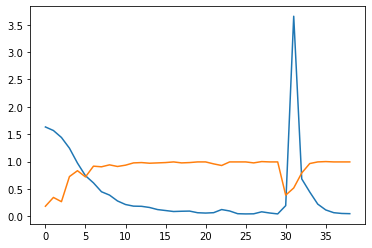

In [20]:
plt.plot(clf.loss_curve_)
plt.plot(clf.validation_scores_)

In [21]:
from sklearn.model_selection import cross_val_score
scores  = cross_val_score(clf, X_train, y_train, cv=5)

In [22]:
print("genAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

genAccuracy: 0.95 (+/- 0.04)


In [16]:
#clf2 = clf = MLPClassifier(hidden_layer_sizes = (10,10,10,10,10), random_state=1, max_iter=300)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
scoring = 'neg_log_loss',
X = X_train,
y = y_train, cv = 3)

In [24]:
print("training set size = ", len(train_sizes))
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

training set size =  5
Training scores:

 [[-1.58494043 -1.43074669 -1.43074669]
 [-0.14528905 -0.35516004 -0.35516004]
 [-0.55481997 -0.1659282  -0.18882021]
 [-0.13874136 -0.12698111 -0.06875675]
 [-0.46276233 -1.5133446  -0.4004054 ]]

 ----------------------------------------------------------------------

Validation scores:

 [[-1.62506295 -1.47578902 -1.46757405]
 [-0.27374386 -0.43882507 -0.49362857]
 [-0.60245781 -0.20832531 -0.20488993]
 [-0.19993221 -0.14480005 -0.08715787]
 [-0.48085151 -1.51267185 -0.41693239]]


In [25]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

In [26]:
print("mean training scores = ", train_scores_mean)
print("mean val scores = ", validation_scores_mean)

mean training scores =  [1.4821446  0.28520304 0.30318946 0.11149307 0.79217078]
mean val scores =  [1.52280867 0.40206583 0.33855768 0.14396338 0.80348525]


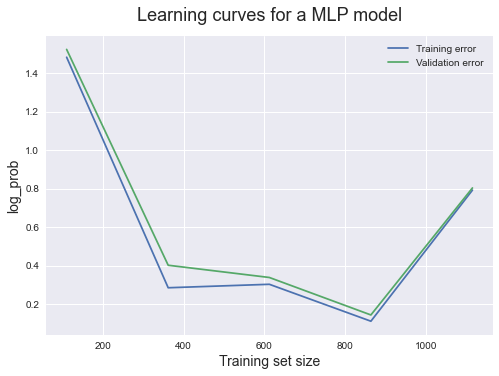

In [27]:


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('log_prob', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a MLP model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)

In [45]:
import cv2

videoCaptureObject = cv2.VideoCapture(0)

upper_left = (50, 50)
bottom_right = (300, 300)

result = True
while(result):
    ret,image_frame = videoCaptureObject.read()

    #Rectangle marker
    r = cv2.rectangle(image_frame, upper_left, bottom_right, (100, 50, 200), 5)
    rect_img = image_frame[upper_left[1] : bottom_right[1], upper_left[0] : bottom_right[0]]
    
    #sketcher_rect = rect_img
    #sketcher_rect = sketch_transform(sketcher_rect)
    
    #Conversion for 3 channels to put back on original image (streaming)
    #sketcher_rect_rgb = cv2.cvtColor(sketcher_rect, cv2.COLOR_GRAY2RGB)
    
    #Replacing the sketched image on Region of Interest
    #image_frame[upper_left[1] : bottom_right[1], upper_left[0] : bottom_right[0]] = sketcher_rect_rgb
    
    cv2.imshow("test", image_frame)
    k = cv2.waitKey(1)

    if k%256 == 27:
        print("Escape hit, closing...") 
        break
    elif k%256 == 32:
        cv2.imwrite("input_image.jpg",rect_img)
        img = cv2.imread("input_image.jpg")

        # you can do those function inside the sketch_transform def

        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.imwrite("gray_img.jpg", gray_image)
        gray_img = cv2.resize(gray_image, (28, 28)).reshape(1,784)
        #ax[2,1].imshow(gray_img.reshape(28, 28) , cmap = "gray")
        #cv2.imshow("image", gray_img.reshape(28, 28))
        print(gray_img)
        gray_img    =   normalizer.transform(gray_img)
        print("norm image = ", gray_img)
        gray_img    =   scaler.transform(gray_img) 
        print("scal = ", gray_img)
        
        

        y_pred =  clf.predict(gray_img)
        print("predicted alphabet  = ", y_pred) 
        #text_to_audio(myDict.get(y_pred[0]))   
videoCaptureObject.release()
cv2.destroyAllWindows()

[[114 121 123 129 130 137 148 156 153 158 160 166 165 165 170 169 168 171
  169 169 174 174 172 174 178 178 175 181 118 123 128 128 138 146 150 159
  160 164 163 161 166 173 175 175 176 171 178 176 179 176 179 180 181 181
  181 179 124 124 130 136 140 149 153 157 160 164 168 170 167 168 171 174
  175 178 174 180 178 182 180 183 184 182 182 184 127 134 132 139 146 149
  153 159 160 163 166 168 170 172 174 178 178 178 178 179 183 185 179 184
  184 185 181 181 131 134 140 147 152 152 157 159 161 167 165 167 173 174
  175 175 178 175 180 185 187 185 186 183 182 180 182 178 134 138 143 148
  151 152 155 159 159 164 166 168 171 172 174 179 180 181 182 184 182 181
  182 183 182 184 185 186 136 140 146 145 156 153 156 158 159 161 166 167
  170 169 173 176 174 178 179 181 181 180 185 183 185 188 189 185 139 145
  146 154 155 157 161 160 161 160 167 172 174 171 172 178 178 179 175 177
  177 182 185 183 188 190 186 191 142 151 152 156 154 158 158 158 164 165
  169 172 175 173 176 177 179 177 160 

[[117 121 130 129 136 139 148 151 155 158 160 162 163 166 166 170 171 171
  173 171 171 175 176 177 177 177 177 182 118 128 125 132 141 144 153 158
  158 162 160 164 167 172 171 172 172 171 177 176 180 178 179 180 178 179
  181 176 127 126 129 138 144 149 150 154 164 165 167 165 168 170 171 175
  172 176 176 180 179 182 184 184 181 181 180 183 129 131 136 142 146 150
  153 158 163 164 164 172 172 170 176 173 179 174 178 179 185 180 182 186
  182 187 187 186 126 137 135 146 149 150 157 157 163 167 167 167 169 174
  176 177 179 175 179 183 184 185 184 185 184 183 182 182 124 138 141 148
  153 152 154 160 162 163 162 164 170 166 172 177 179 182 183 184 184 182
  183 183 182 185 182 183 136 140 150 148 159 157 157 160 163 161 164 165
  169 172 174 175 178 176 179 182 181 185 185 183 185 186 190 189 135 149
  147 153 157 157 158 160 165 162 169 169 166 173 176 174 179 178 182 184
  184 186 185 182 188 189 188 184 147 148 153 150 153 156 161 161 166 168
  169 171 170 172 181 175 174 178 180 

[[116 126 128 130 140 139 148 152 159 157 162 163 166 168 168 169 168 170
  171 171 179 176 176 177 177 181 177 179 121 122 124 132 140 141 157 160
  160 162 164 166 166 173 173 175 177 171 173 178 179 177 175 182 178 184
  182 181 126 126 131 140 143 146 154 161 159 163 163 167 167 173 173 174
  179 177 177 180 182 181 180 185 184 184 179 184 124 134 135 144 149 153
  154 158 159 163 164 169 167 173 172 182 179 179 180 183 181 184 184 183
  186 186 184 181 129 130 140 145 146 152 156 160 163 162 167 167 170 173
  176 175 179 180 181 182 189 182 187 185 181 183 185 185 130 141 144 150
  153 155 157 164 162 161 166 165 167 171 173 178 177 183 180 185 183 182
  185 182 185 188 185 183 138 146 151 152 153 158 157 161 163 163 167 168
  169 172 179 178 176 180 180 180 179 182 187 186 186 190 191 189 140 146
  149 153 156 160 158 160 162 165 169 173 170 175 176 180 181 181 179 183
  186 186 187 188 188 187 190 189 142 152 153 157 154 157 161 163 166 164
  168 172 173 173 177 180 180 184 183 

[[118 121 129 128 133 140 149 151 156 162 159 164 165 167 168 169 168 172
  174 170 173 176 178 178 177 178 180 181 120 127 131 132 142 143 154 156
  160 166 164 164 165 171 174 169 174 176 176 176 175 178 179 177 178 182
  180 180 122 124 133 137 143 153 156 160 159 163 165 167 169 175 173 173
  177 174 177 180 178 182 186 183 186 181 183 180 128 129 142 142 147 150
  155 158 161 163 160 170 170 174 176 178 177 179 182 180 180 182 182 188
  184 185 185 186 128 129 143 144 146 152 155 157 161 164 164 164 165 172
  171 176 177 177 182 181 184 185 187 188 182 183 181 182 136 141 142 151
  150 155 155 160 159 161 166 164 166 172 174 175 180 179 182 184 182 185
  186 183 183 185 184 184 140 148 146 151 156 156 155 160 160 166 164 163
  166 169 170 168 176 177 177 183 181 184 187 185 186 189 187 188 144 148
  150 154 157 154 159 158 166 166 164 167 168 170 172 171 178 179 179 183
  183 186 189 184 191 189 185 190 143 144 151 157 158 157 158 158 163 164
  166 169 171 171 169 170 175 175 178 

[[164 162 168 169 170 173 172 172 176 174 175 178 176 176 180 181 182 185
  185 187 187 187 193 193 192 196 187 188 162 171 168 171 171 173 176 173
  174 180 171 183 188 187 185 187 187 193 192 196 196 200 200 197 198 200
  196 195 168 168 172 172 177 174 176 180 179 183 187 185 188 183 187 187
  189 194 195 199 196 196 199 199 199 197 200 194 169 172 174 177 174 181
  180 181 184 182 183 184 188 184 186 190 194 195 199 202 198 200 201 201
  198 199 200 198 170 173 173 174 178 179 182 186 183 188 186 188 187 187
  187 192 196 199 200 198 200 199 202 199 201 199 201 199 168 174 174 173
  177 182 182 184 189 188 186 184 181 191 191 190 195 198 197 199 197 201
  204 202 198 200 206 204 168 171 179 176 178 178 184 185 186 185 181 203
  191 185 198 196 198 198 201 200 202 203 204 208 203 205 209 205 173 176
  178 178 181 183 183 185 185 191 170 121 172 183 196 195 201 201 201 199
  203 204 203 209 208 210 211 213 176 178 179 182 184 186 187 190 187 139
  130 128 156 244 181 197 204 202 202 

[[161 167 167 169 171 172 170 173 175 176 174 178 178 180 179 182 178 187
  187 192 193 195 194 194 193 193 192 191 165 167 172 175 175 173 173 176
  183 181 181 185 181 181 181 182 187 193 196 197 197 194 193 195 194 196
  192 193 167 172 175 173 175 178 178 178 182 184 182 185 182 187 184 187
  189 193 198 196 195 198 198 195 197 196 194 194 168 172 176 176 173 179
  176 182 179 185 189 188 188 189 189 191 192 196 199 198 197 197 200 198
  198 196 197 200 167 172 174 172 177 178 178 178 182 186 186 191 193 192
  192 193 197 195 197 198 198 199 199 199 199 201 202 199 168 176 176 173
  175 173 184 191 177 183 189 190 193 194 199 197 196 196 196 199 199 200
  203 202 202 206 200 204 169 176 175 179 181 179 126 170 178 180 188 196
  197 193 195 199 199 201 198 200 203 202 202 204 204 207 207 205 171 178
  178 179 182 185 160 155 196 177 189 197 196 198 198 202 199 201 198 201
  200 204 206 207 206 209 209 212 173 177 177 181 183 184 183 158 210 177
  187 195 199 201 201 202 198 194 187 

[[177 178 182 181 183 185 188 191 194 194 194 198 196 198 196 201 196 200
  203 204 205 210 212 208 209 210 211 209 183 183 186 190 191 191 195 194
  196 192 171 205 200 206 201 205 203 201 210 211 213 215 211 215 217 214
  216 215 183 186 192 195 190 196 199 198 199 199 132 139 202 203 201 208
  205 205 209 210 211 210 211 215 216 215 214 218 184 187 192 192 198 196
  197 204 203 200 139 141 191 208 204 207 202 204 209 213 211 213 213 216
  216 217 218 220 187 197 193 197 198 203 202 206 201 207 144 137 163 204
  207 208 206 205 211 213 217 216 215 211 218 218 221 221 186 195 195 201
  205 203 203 207 207 210 201 146 163 208 206 206 202 204 211 212 216 230
  210 215 215 221 221 222 190 193 198 201 210 210 209 212 212 208 204 147
  148 201 208 208 209 207 212 216 219 181 212 213 220 223 225 229 193 196
  200 201 202 209 210 209 209 215 207 150 148 174 210 208 209 208 213 214
  224 171 213 218 221 227 224 225 196 197 202 201 199 204 209 209 213 211
  212 148 153 161 201 207 206 207 210 

[[179 179 179 182 184 191 191 191 193 191 196 194 196 198 195 193 194 191
  191 199 205 205 208 206 204 206 208 212 181 188 187 190 190 192 190 193
  198 195 195 200 199 183 218 195 196 198 197 202 204 213 211 214 216 217
  219 218 183 185 191 190 192 199 194 196 198 200 200 203 199 140 144 193
  195 195 195 200 207 207 213 213 215 214 214 223 179 189 191 195 197 196
  197 199 202 201 199 194 199 137 133 190 191 192 195 200 205 209 214 219
  216 218 221 223 184 193 193 196 200 198 199 202 200 201 200 147 138 125
  134 184 223 201 195 203 209 213 218 213 222 220 220 220 190 192 193 201
  203 205 204 203 202 202 195 148 147 140 156 128 137 157 198 202 212 212
  220 222 223 222 223 227 187 197 199 201 209 209 209 209 208 202 165 142
  131 138 147 138 141 157 202 201 213 214 218 223 222 225 225 225 190 199
  203 204 204 207 206 207 208 211 168 148 143 137 143 138 142 146 200 209
  212 220 223 227 231 231 228 226 195 198 200 202 198 203 206 206 199 205
  146 146 144 137 141 140 153 184 200 

[[180 179 183 184 183 188 193 189 191 194 198 199 200 205 202 200 202 204
  204 204 209 209 207 207 207 210 208 214 181 184 183 185 190 191 193 196
  195 201 203 200 207 210 210 211 210 209 210 211 212 215 216 217 214 217
  214 219 186 185 189 193 193 197 197 199 199 202 205 207 208 211 212 213
  210 215 211 214 216 216 219 217 221 221 217 221 183 184 189 193 194 198
  195 203 199 201 203 209 211 211 212 211 214 214 215 216 217 220 217 218
  220 218 221 223 185 192 192 198 195 197 202 200 200 201 208 208 204 212
  214 216 216 218 219 219 218 221 220 220 224 221 226 219 188 197 199 201
  202 201 204 201 227 201 202 204 210 208 212 217 215 218 220 223 224 223
  224 225 223 223 225 223 190 195 196 203 203 206 209 144 158 205 205 205
  205 209 211 216 214 219 223 220 225 225 227 230 226 224 229 231 191 201
  201 204 206 210 203 143 152 207 203 204 202 205 212 213 220 222 223 227
  229 227 228 229 232 233 228 228 190 203 203 201 199 206 205 145 133 206
  204 202 199 206 207 212 217 220 223 

Escape hit, closing...


In [1]:
myDict.get(16)

NameError: name 'myDict' is not defined

In [46]:
import pyttsx3 
def text_to_audio(letter):
    # Initialize the converter 
    converter = pyttsx3.init() 

    # Set properties before adding 
    # Things to say 

    # Sets speed percent  
    # Can be more than 100 
    converter.setProperty('rate', 150) 
    # Set volume 0-1 
    converter.setProperty('volume', 0.7) 

    # Queue the entered text  
    # There will be a pause between 
    # each one like a pause in  
    # a sentence 
    converter.say(letter)
    #converter.say("Hello GeeksforGeeks") 
    #converter.say("I'm also a geek") 

    # Empties the say() queue 
    # Program will not continue 
    # until all speech is done talking 
    converter.runAndWait() 

MODEL 2 : CNN

In [87]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
#28*28
#X_train = np.array(X_train).reshape(-1,28,28,1)
#X_test = np.array(X_test).reshape(-1,28,28,1)
X_train = np.array(X_train).reshape(-1,78,78,1)
X_test = np.array(X_test).reshape(-1,78,78,1)




In [88]:
X_train.shape
#type(X_train)
y_train.shape

(1671,)

In [89]:
X_test.shape

(824, 78, 78, 1)

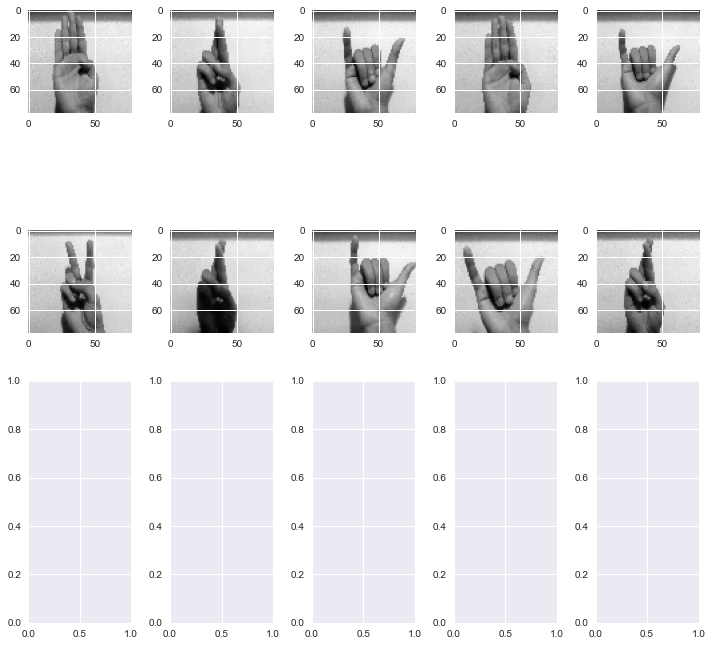

In [31]:
f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(78, 78) , cmap = "gray")
        k += 1
    plt.tight_layout()    

In [90]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [91]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (78,78,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
#model.add(Dense(units = 24 , activation = 'softmax'))
model.add(Dense(units = 5 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 78, 78, 75)        750       
_________________________________________________________________
batch_normalization_12 (Batc (None, 78, 78, 75)        300       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 39, 39, 75)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 39, 39, 50)        33800     
_________________________________________________________________
dropout_8 (Dropout)          (None, 39, 39, 50)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 39, 39, 50)        200       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 20, 20, 50)       

In [92]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)



In [93]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [94]:



print(X_train.shape)
print(type(X_train))
print(X_test.shape)
print(type(X_test))

print(y_train.shape)
print(type(y_train))
print(y_test.shape)
print(type(y_test))

(1671, 78, 78, 1)
<class 'numpy.ndarray'>
(824, 78, 78, 1)
<class 'numpy.ndarray'>
(1671, 5)
<class 'numpy.ndarray'>
(824, 5)
<class 'numpy.ndarray'>


In [95]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (X_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
14/14 [==============================] - 34s 2s/step - loss: 2.6074 - accuracy: 0.5218 - val_loss: 1.5560 - val_accuracy: 0.2342
Epoch 2/20
14/14 [==============================] - 32s 2s/step - loss: 0.3855 - accuracy: 0.8600 - val_loss: 3.2876 - val_accuracy: 0.2112
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9521
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
14/14 [==============================] - 31s 2s/step - loss: 0.1550 - accuracy: 0.9521 - val_loss: 6.7509 - val_accuracy: 0.2112
Epoch 4/20
14/14 [==============================] - 32s 2s/step - loss: 0.1671 - accuracy: 0.9449 - val_loss: 9.3795 - val_accuracy: 0.2112
Epoch 5/20
14/14 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9659
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
14/14 [==============================] - 31s 2s/step - loss: 0.1053 - accuracy: 0.9659 - val_loss: 11.4

In [40]:
type(X_train)

numpy.ndarray

In [46]:
#history = model.fit(datagen.flow(X_train,y_train, batch_size = 128) ,epochs = 5 , validation_data = (X_test, y_test) , callbacks = [learning_rate_reduction])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported numpy type: NPY_INT).

In [1]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


NameError: name 'plt' is not defined

In [97]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
#model.save_weights("Sign_detection_model.h5")
model.save('Sign_detection.h5')

In [21]:
from tensorflow import keras
model = keras.models.load_model('Sign_detection.h5')

In [26]:
#model.predict_classes(X_test)
model.predict_classes(test)

array([23], dtype=int64)

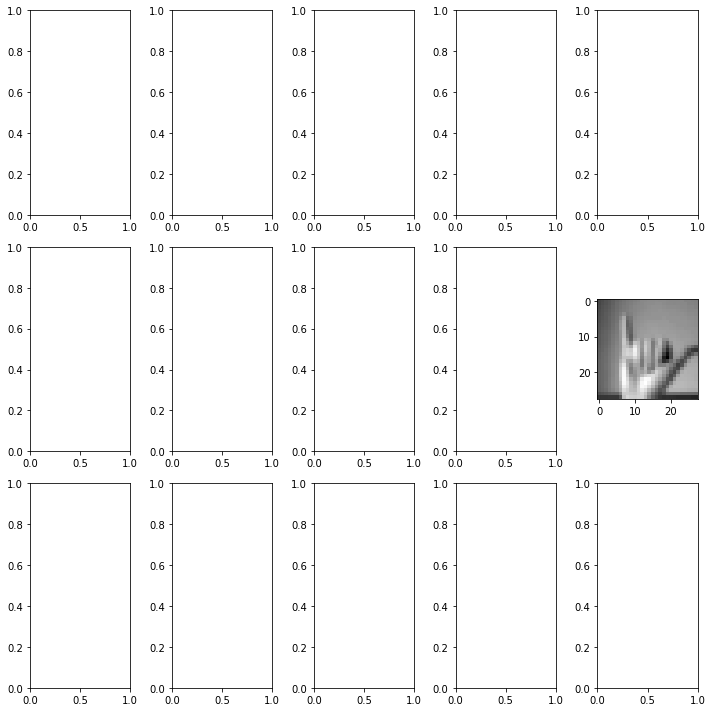

In [24]:
test = X_test[:1]

f, ax = plt.subplots(3,5) 
f.set_size_inches(10, 10)
ax[i,j].imshow(test.reshape(28, 28) , cmap = "gray")
#k += 1
plt.tight_layout() 


In [20]:
predictions = model.predict_classes(test)

In [23]:
import pyttsx3 
def text_to_audio(letter):
    # Initialize the converter 
    converter = pyttsx3.init() 

    # Set properties before adding 
    # Things to say 

    # Sets speed percent  
    # Can be more than 100 
    converter.setProperty('rate', 150) 
    # Set volume 0-1 
    converter.setProperty('volume', 0.7) 

    # Queue the entered text  
    # There will be a pause between 
    # each one like a pause in  
    # a sentence 
    converter.say("letter indicated through sign language is")
    converter.say(letter)
    #converter.say("Hello GeeksforGeeks") 
    #converter.say("I'm also a geek") 

    # Empties the say() queue 
    # Program will not continue 
    # until all speech is done talking 
    converter.runAndWait() 

ModuleNotFoundError: No module named 'pyttsx3'

In [101]:
import cv2

videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imshow("test", frame)
    k = cv2.waitKey(1)
    
    if k%256 == 27:
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        print("frame shape = ", frame.shape)
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print("gray_image = ", gray_image.shape)
        cv2.imwrite("input_image.jpg",gray_image)
        img = cv2.imread("input_image.jpg")
        gray_image2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print(gray_image2.shape)
        gray_img = cv2.resize(gray_image, (78, 78)).reshape(1,78,78,1)
        gray_img = gray_img/255
        y_pred =  model.predict_classes(gray_img)
        
        
        
        
        
        #cv2.imwrite("input_image.jpg",frame)
        #img = cv2.imread("input_image.jpg")
        #gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        #gray_img = cv2.resize(gray_image, (78, 78)).reshape(1,78,78,1)
        #ax[2,1].imshow(gray_img.reshape(28, 28) , cmap = "gray")
        #cv2.imshow("image", gray_img.reshape(28, 28))
        #y_pred =  model.predict_classes(gray_img)
        #print("predicted alphabet  = ", y_pred) 
        #text_to_audio(myDict.get(y_pred[0]))
        
        result = False

        
videoCaptureObject.release()
cv2.destroyAllWindows()

Escape hit, closing...


In [109]:
import matplotlib.pyplot as plt
import cv2

videoCaptureObject = cv2.VideoCapture(0)

upper_left = (50, 50)
bottom_right = (300, 300)

result = True
i = 0
while(result):
    ret,image_frame = videoCaptureObject.read()

    #Rectangle marker
    r = cv2.rectangle(image_frame, upper_left, bottom_right, (100, 50, 200), 5)
    rect_img = image_frame[upper_left[1] : bottom_right[1], upper_left[0] : bottom_right[0]]
    
    #sketcher_rect = rect_img
    #sketcher_rect = sketch_transform(sketcher_rect)
    
    #Conversion for 3 channels to put back on original image (streaming)
    #sketcher_rect_rgb = cv2.cvtColor(sketcher_rect, cv2.COLOR_GRAY2RGB)
    
    #Replacing the sketched image on Region of Interest
    #image_frame[upper_left[1] : bottom_right[1], upper_left[0] : bottom_right[0]] = sketcher_rect_rgb
    
    cv2.imshow("test", image_frame)
    k = cv2.waitKey(1)

    if k%256 == 27:
        print("Escape hit, closing...") 
        break
    elif k%256 == 32:
        #print("rect shape = ", rect_img.shape)
        gray_image1 = cv2.cvtColor(rect_img, cv2.COLOR_BGR2GRAY)
        #print("gray_image = ", gray_image1.shape)
        cv2.imwrite("gray_image1.jpg",gray_image1)
        img = cv2.imread("gray_image1.jpg")
        gray_image2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite("gray_image2.jpg",gray_image2)
        
        #print("g2shape = ", gray_image2.shape)
        resize_img1 = cv2.resize(gray_image2, (78, 78))
        cv2.imwrite("resize_img1.jpg", resize_img1)
        #resize_img1 = resize_img1.flatten()
        resize_img1 = resize_img1/255
        #resize_img1 = resize_img1.reshape(1,6084)
        #print(resize_img1.shape)
        reshaped_img = resize_img1.reshape(1,78,78,1)
        y_pred =  model.predict_classes(reshaped_img)
        #y_pred = clf.predict(resize_img1)
        print("y_pred =", y_pred)
        #cv2.imwrite("input_image.jpg",rect_img)
        #img = cv2.imread("input_image.jpg")

        # you can do those function inside the sketch_transform def
        
        #name  = "Enter class label here" + str(i) + ".jpg"
        #gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #cv2.imwrite(name, gray_image)
        
  
        
        

        #y_pred =  model.predict_classes(img)
        #print("predicted alphabet  = ", y_pred) 
        #text_to_audio(myDict.get(y_pred[0]))   
videoCaptureObject.release()
cv2.destroyAllWindows()

(1, 6084)
y_pred = [2]
(1, 6084)
y_pred = [2]
(1, 6084)
y_pred = [2]
(1, 6084)
y_pred = [2]
(1, 6084)
y_pred = [2]
(1, 6084)
y_pred = [2]
Escape hit, closing...


NoneType